In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
df=pd.read_csv("churn.csv")

Data Cleaning

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
pip install tensorflow

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df.head(6)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
cust_yes_count = df[df.Churn == 'Yes'].shape[0]
cust_no_count=df[df.Churn=='No'].shape[0]
cust_total_count=df.shape[0]

In [ ]:
cust_yes_percent=round(cust_yes_count/cust_total_count*100,2)
cust_no_percent=round(cust_no_count/cust_total_count*100,2)

Data Visualisation

<ipython-input-33-d723ea23dbcc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['Churn'], palette={"No": "red", "Yes": "green"})


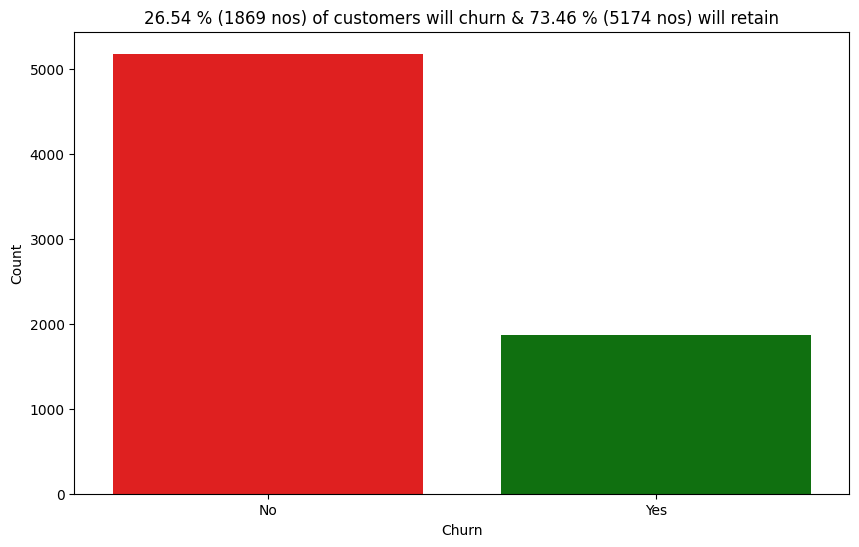

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x=df['Churn'], palette={"No": "red", "Yes": "green"})
ax.set_title(f'{cust_yes_percent} % ({cust_yes_count} nos) of customers will churn & {cust_no_percent} % ({cust_no_count} nos) will retain')
plt.xlabel("Churn")
plt.ylabel("Count")

plt.show()


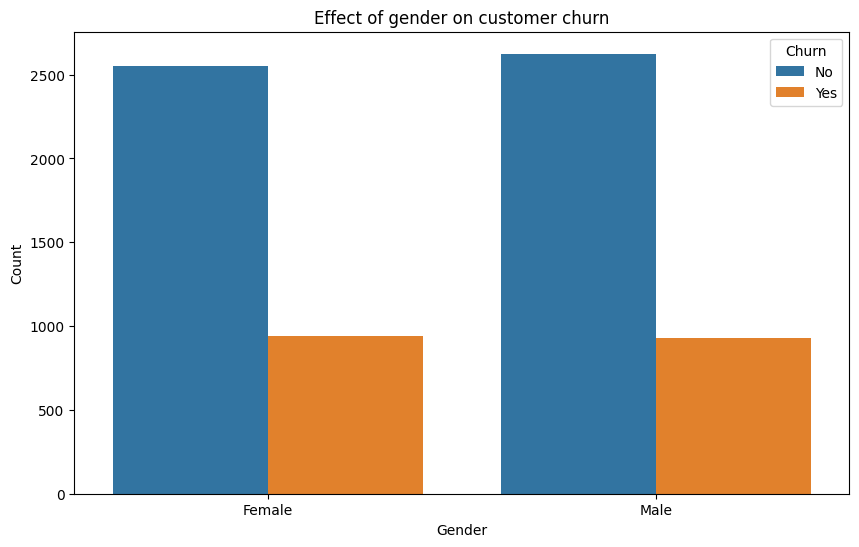

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='gender',hue='Churn',data=df)
ax.set_title(f'Effect of gender on customer churn')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

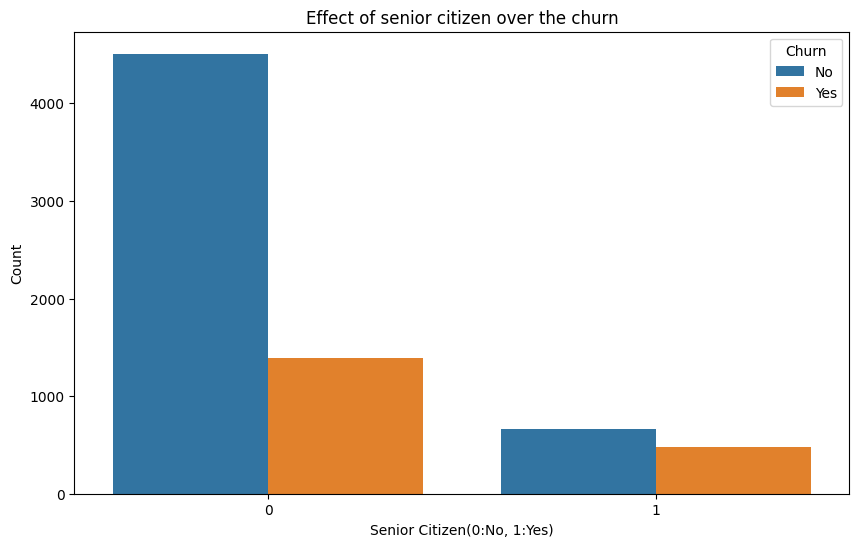

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='SeniorCitizen',hue='Churn',data=df)
ax.set_title(f"Effect of senior citizen over the churn")
plt.xlabel('Senior Citizen(0:No, 1:Yes)')
plt.ylabel('Count')
plt.show()

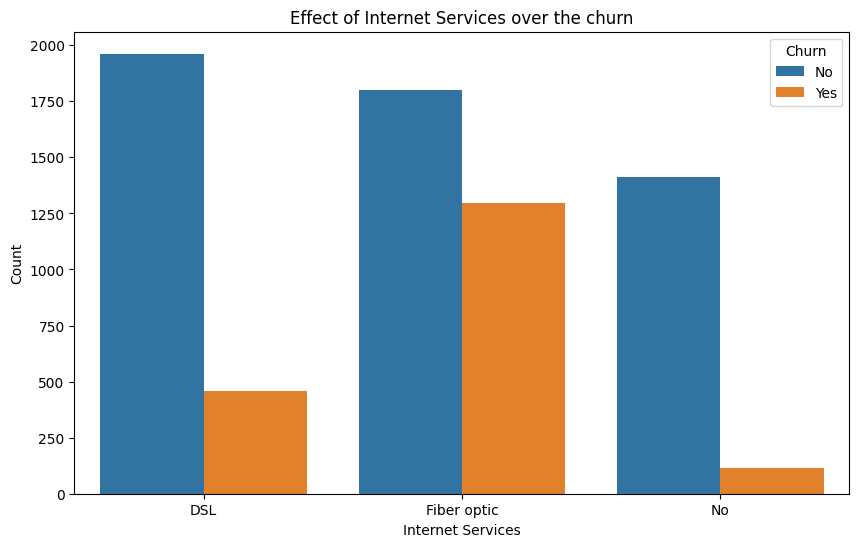

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='InternetService',hue='Churn',data=df)
ax.set_title(f"Effect of Internet Services over the churn")
plt.xlabel('Internet Services')
plt.ylabel('Count')
plt.show()

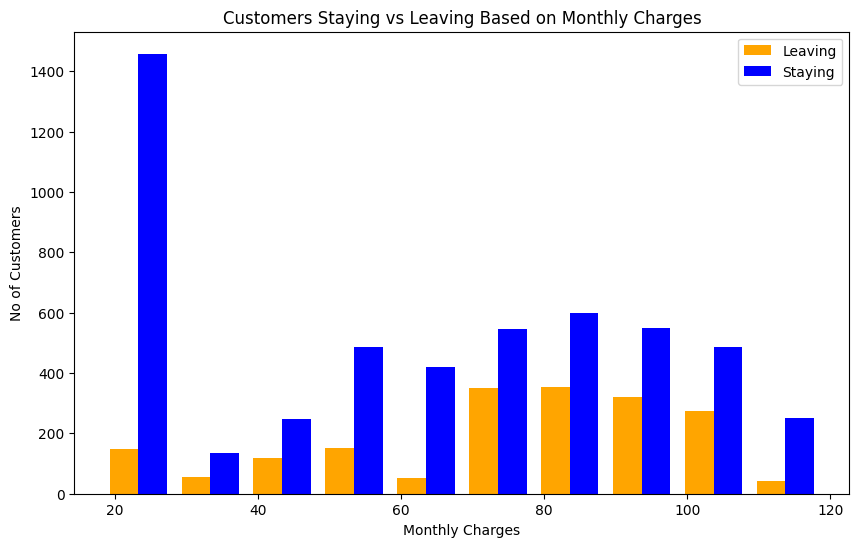

In [ ]:
monthly_charges_churn_yes = df[df.Churn == 'Yes'].MonthlyCharges
monthly_charges_churn_no = df[df.Churn == 'No'].MonthlyCharges


plt.figure(figsize=(10,6))
plt.hist([monthly_charges_churn_yes, monthly_charges_churn_no], color=['orange', 'blue'], label= ['Leaving', 'Staying'])
plt.xlabel('Monthly Charges')
plt.ylabel('No of Customers')
plt.title('Customers Staying vs Leaving Based on Monthly Charges')
plt.legend()

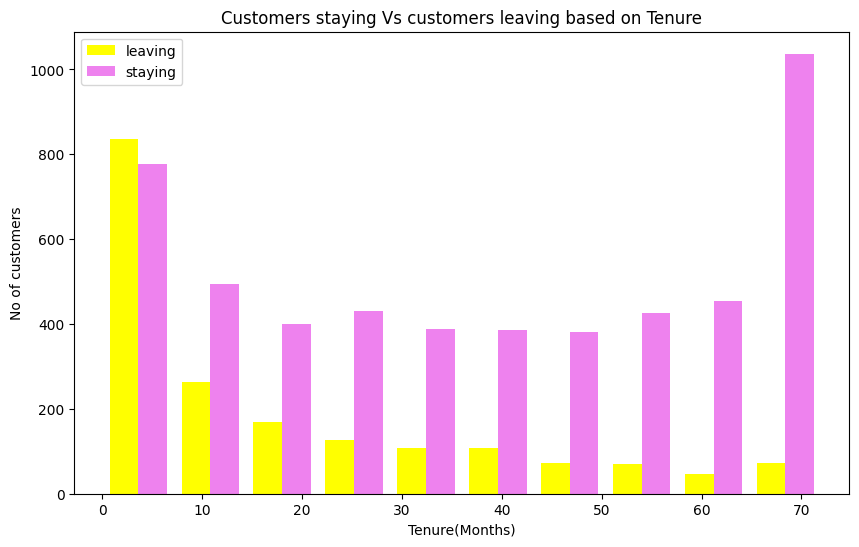

In [ ]:
# @title Default title text
tenure_yes=df[df.Churn=="Yes"].tenure
tenure_no=df[df.Churn=="No"].tenure

plt.figure(figsize=(10,6))
plt.hist([tenure_yes,tenure_no],color=['yellow','violet'],label=['leaving','staying'])
plt.xlabel("Tenure(Months)")
plt.ylabel("No of customers")
plt.title(f"Customers staying Vs customers leaving based on Tenure")
plt.legend()
plt.show()

Data Pre-processing

In [ ]:
df1=df.drop('customerID',axis='columns')
df1.shape

(7043, 20)

In [ ]:
df1.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [ ]:
df1.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
df1[df1['TotalCharges']==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df1.TotalCharges=df1.TotalCharges.replace(r' ','0')
df1[df1.tenure == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,No


In [ ]:
df1["TotalCharges"] = df1["TotalCharges"].replace(" ", np.nan)

df1["TotalCharges"] = pd.to_numeric(df1["TotalCharges"], errors="coerce")

print(f"New datatype of TotalCharges: {df1.TotalCharges.dtype}")


New datatype of TotalCharges: float64


In [ ]:
def print_unique_col_values(df):
  print(f"Unique columns inf each category of columns")
  for column in df.columns:
    if df[column].dtype==object:
      print(f"column:{column},unique_value:{df[column].unique()}")

print_unique_col_values(df)


Unique columns inf each category of columns
column:customerID,unique_value:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
column:gender,unique_value:['Female' 'Male']
column:Partner,unique_value:['Yes' 'No']
column:Dependents,unique_value:['No' 'Yes']
column:PhoneService,unique_value:['No' 'Yes']
column:MultipleLines,unique_value:['No phone service' 'No' 'Yes']
column:InternetService,unique_value:['DSL' 'Fiber optic' 'No']
column:OnlineSecurity,unique_value:['No' 'Yes' 'No internet service']
column:OnlineBackup,unique_value:['Yes' 'No' 'No internet service']
column:DeviceProtection,unique_value:['No' 'Yes' 'No internet service']
column:TechSupport,unique_value:['No' 'Yes' 'No internet service']
column:StreamingTV,unique_value:['No' 'Yes' 'No internet service']
column:StreamingMovies,unique_value:['No' 'Yes' 'No internet service']
column:Contract,unique_value:['Month-to-month' 'One year' 'Two year']
column:PaperlessBilling,unique_value:['Yes' 'No']


In [ ]:
df1.replace('No phone service','No',inplace=True)
df1.replace('No internet service','No',inplace=True)

print_unique_col_values(df1)

Unique columns inf each category of columns
column:gender,unique_value:['Female' 'Male']
column:Partner,unique_value:['Yes' 'No']
column:Dependents,unique_value:['No' 'Yes']
column:PhoneService,unique_value:['No' 'Yes']
column:MultipleLines,unique_value:['No' 'Yes']
column:InternetService,unique_value:['DSL' 'Fiber optic' 'No']
column:OnlineSecurity,unique_value:['No' 'Yes']
column:OnlineBackup,unique_value:['Yes' 'No']
column:DeviceProtection,unique_value:['No' 'Yes']
column:TechSupport,unique_value:['No' 'Yes']
column:StreamingTV,unique_value:['No' 'Yes']
column:StreamingMovies,unique_value:['No' 'Yes']
column:Contract,unique_value:['Month-to-month' 'One year' 'Two year']
column:PaperlessBilling,unique_value:['Yes' 'No']
column:PaymentMethod,unique_value:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
column:Churn,unique_value:['No' 'Yes']


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False,drop='first')

In [ ]:
def print_unique_col_values(df):
    """Print unique values from categorical columns of the given dataframe"""
    print('Unique values from categorical columns,\n')
    for column in df.columns:
        if(df[column].dtypes == 'object'):
            print(f'column: {column}, Unique vlaues: {df[column].unique()}')

print_unique_col_values(df1)

Unique values from categorical columns,

column: gender, Unique vlaues: ['Female' 'Male']
column: Partner, Unique vlaues: ['Yes' 'No']
column: Dependents, Unique vlaues: ['No' 'Yes']
column: PhoneService, Unique vlaues: ['No' 'Yes']
column: MultipleLines, Unique vlaues: ['No' 'Yes']
column: InternetService, Unique vlaues: ['DSL' 'Fiber optic' 'No']
column: OnlineSecurity, Unique vlaues: ['No' 'Yes']
column: OnlineBackup, Unique vlaues: ['Yes' 'No']
column: DeviceProtection, Unique vlaues: ['No' 'Yes']
column: TechSupport, Unique vlaues: ['No' 'Yes']
column: StreamingTV, Unique vlaues: ['No' 'Yes']
column: StreamingMovies, Unique vlaues: ['No' 'Yes']
column: Contract, Unique vlaues: ['Month-to-month' 'One year' 'Two year']
column: PaperlessBilling, Unique vlaues: ['Yes' 'No']
column: PaymentMethod, Unique vlaues: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
column: Churn, Unique vlaues: ['No' 'Yes']


In [ ]:
df1['Churn'].replace({'Yes':1,'No':0},inplace=True)

<ipython-input-50-0122c6555eaf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Churn'].replace({'Yes':1,'No':0},inplace=True)
<ipython-input-50-0122c6555eaf>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Churn'].replace({'Yes':1,'No':0},inplace=True)


In [ ]:
df1.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
# Create df2 for cleaned dataset
df2 = pd.get_dummies(data = df1)

print(f'So we have added {df2.shape[1]- df1.shape[1]} more columns to our list. New shape : {df2.shape}')
df2.sample(5)

So we have added 19 more columns to our list. New shape : (7043, 39)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5801,1,34,75.55,2425.40,0,False,True,False,True,True,...,False,True,False,False,False,True,False,False,True,False
4212,0,1,90.60,90.60,1,True,False,True,False,True,...,True,True,False,False,True,False,False,False,True,False
5392,0,63,39.35,2395.05,0,False,True,False,True,False,...,False,False,False,True,True,False,True,False,False,False
510,1,20,94.30,1818.30,0,False,True,False,True,False,...,True,False,True,False,True,False,False,True,False,False
3386,0,58,68.40,3972.25,0,True,False,False,True,True,...,True,False,True,False,False,True,False,False,True,False


In [ ]:
df2 = pd.get_dummies(data = df1)

print(f'So we have added {df2.shape[1]- df1.shape[1]} more columns to our list. New shape : {df2.shape}')
df2.sample(5)

So we have added 19 more columns to our list. New shape : (7043, 39)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
993,0,10,26.10,225.55,0,True,False,False,True,False,...,False,False,False,True,True,False,False,True,False,False
3744,0,26,75.50,2018.10,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
7003,0,26,35.75,1022.50,0,False,True,True,False,True,...,False,True,False,False,True,False,False,False,True,False
6826,0,4,20.70,83.75,0,False,True,True,False,True,...,False,True,False,False,False,True,False,True,False,False
3278,0,65,79.40,5071.90,0,True,False,False,True,False,...,True,False,False,True,False,True,True,False,False,False


In [ ]:
df2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


In [ ]:
dummies=pd.get_dummies(df2.Partner_No)

In [ ]:
df2.dtypes

,0
SeniorCitizen,int64
tenure,int64
MonthlyCharges,float64
TotalCharges,float64
Churn,int64
gender_Female,bool
gender_Male,bool
Partner_No,bool
Partner_Yes,bool
Dependents_No,bool


In [ ]:

def convert_bool_columns(df):
    bool_cols = df.select_dtypes(include=['bool']).columns
    df[bool_cols] = df[bool_cols].astype(int)  # Convert True to 1, False to 0

convert_bool_columns(df2)  # Modify df2 in place


In [ ]:
df2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


Scaling And Normalization

In [ ]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale]) # Fit to data, then transform it
df2[cols_to_scale].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,0.449599,0.462803,0.262497
std,0.341104,0.299403,0.261007
min,0.000000,0.000000,0.000000
25%,0.125000,0.171642,0.045891
50%,0.402778,0.518408,0.160574
75%,0.763889,0.712438,0.436003
max,1.000000,1.000000,1.000000


Train Test Split

In [ ]:
X = df2.drop('Churn',axis='columns')
y=df2['Churn']

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(f'X_train: {X_train.shape}, X_train: {y_train.shape}')
print(f'X_test: {X_train.shape}, X_test: {y_train.shape}')

X_train.sample(5)

X_train: (5634, 38), X_train: (5634,)
X_test: (5634, 38), X_test: (5634,)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2800,0,0.277778,0.020896,0.050963,1,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
1988,1,0.805556,0.901493,0.723937,0,1,0,1,1,0,...,1,0,1,0,0,1,0,0,1,0
5871,0,0.333333,0.372139,0.161265,0,1,1,0,1,0,...,0,1,0,0,0,1,1,0,0,0
6142,0,0.583333,0.318408,0.253736,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4651,0,0.208333,0.676119,0.146256,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0


Modelling

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(38, input_shape=(38,), activation='relu'),
    tf.keras.layers.Dense(14, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7419 - loss: 0.5244
Epoch 2/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7957 - loss: 0.4304
Epoch 3/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8017 - loss: 0.4156
Epoch 4/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7972 - loss: 0.4212
Epoch 5/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8047 - loss: 0.4183
Epoch 6/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7978 - loss: 0.4212
Epoch 7/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8027 - loss: 0.4211
Epoch 8/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8053 - loss: 0.4201
Epoch 9/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8071 - loss: 0.4084
Epoch 10/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7965 - loss: 0.4205
Epoch 11/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8100 - loss: 0.4111
Epoch 12/100
177/177 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
model.evaluate(X_test, y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7836 - loss: 0.4588


[0.4778847098350525, 0.779985785484314]

In [ ]:
predictions = model.predict(X_test)
predictions[:5]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.6222063 ],
       [0.0657534 ],
       [0.00726293],
       [0.60663545],
       [0.00810946]], dtype=float32)

In [ ]:
y_pred = []

for val in predictions:
  if val>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

y_pred[:10]

[1, 0, 0, 1, 0, 0, 0, 0, 1, 0]

In [ ]:
df_true_pred = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
df_true_pred[:10]

,y_test,y_pred
185,1,1
2715,0,0
3825,0,0
1807,1,1
132,0,0
1263,1,0
3732,0,0
1672,0,0
811,1,1
2526,1,0


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1036
           1       0.59      0.55      0.57       373

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



Text(95.72222222222221, 0.5, 'true_value')

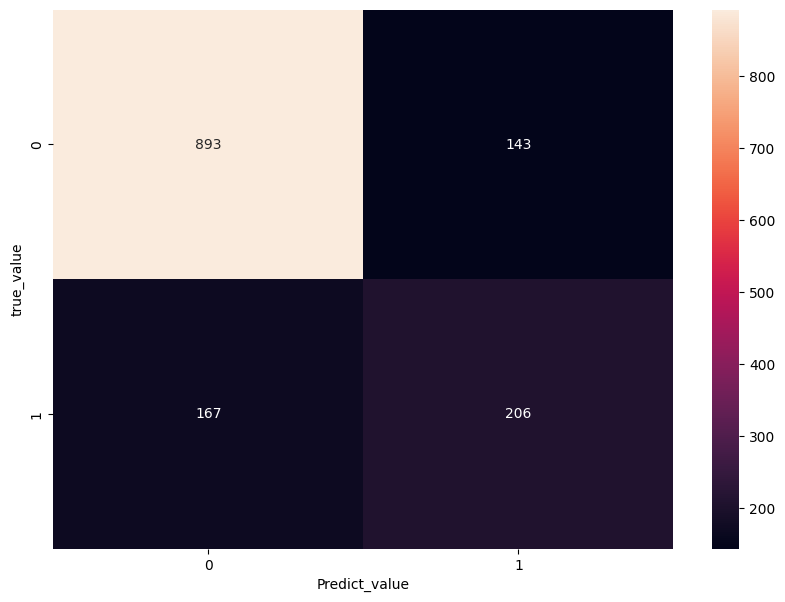

In [ ]:
dg= tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(dg, annot=True, fmt='d')
plt.xlabel('Predict_value')
plt.ylabel('true_value')